In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

mta = pd.read_csv("MTA_Daily_Ridership.csv")
accidents = pd.read_csv("NYC Accidents 2020.csv")
weather = pd.read_csv("NYC_weather_data_Jan-Aug2020.csv")

In [2]:
print("Accidents Dataset:")
accidents.info()
accidents.head()

Accidents Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     74881 non-null  object 
 1   CRASH TIME                     74881 non-null  object 
 2   BOROUGH                        49140 non-null  object 
 3   ZIP CODE                       49134 non-null  float64
 4   LATITUDE                       68935 non-null  float64
 5   LONGITUDE                      68935 non-null  float64
 6   LOCATION                       68935 non-null  object 
 7   ON STREET NAME                 55444 non-null  object 
 8   CROSS STREET NAME              35681 non-null  object 
 9   OFF STREET NAME                19437 non-null  object 
 10  NUMBER OF PERSONS INJURED      74881 non-null  int64  
 11  NUMBER OF PERSONS KILLED       74881 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJUR

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


Correlation Matrix:
                          Accident_Count  Temperature (°F) Avg  \
Accident_Count                  1.000000              0.225022   
Temperature (°F) Avg            0.225022              1.000000   
Precipitation (in) Total       -0.018606             -0.011818   
Humidity (%) Avg               -0.020263              0.066162   
High_Ridership                  0.672628              0.410130   

                          Precipitation (in) Total  Humidity (%) Avg  \
Accident_Count                           -0.018606         -0.020263   
Temperature (°F) Avg                     -0.011818          0.066162   
Precipitation (in) Total                  1.000000          0.210881   
Humidity (%) Avg                          0.210881          1.000000   
High_Ridership                            0.017298          0.036059   

                          High_Ridership  
Accident_Count                  0.672628  
Temperature (°F) Avg            0.410130  
Precipitation (in) To

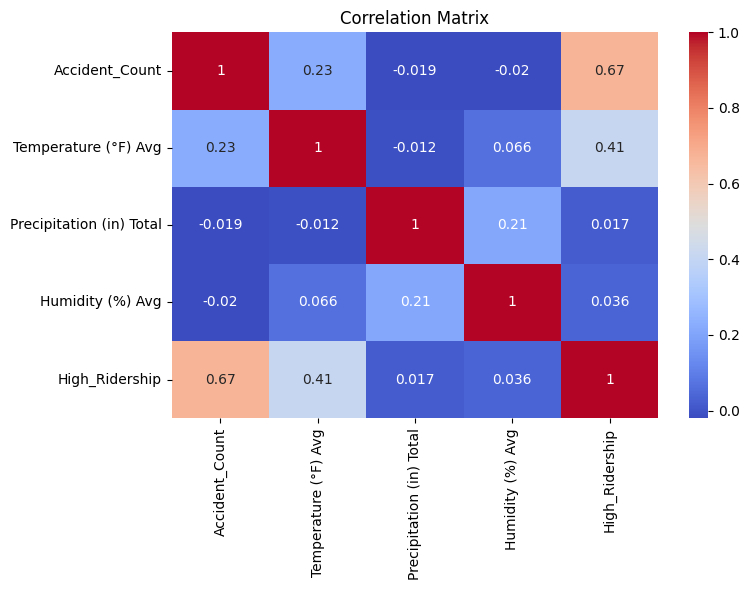

VIF Table:
                    Feature        VIF
0                     const  37.248753
1            Accident_Count   1.054798
2      Temperature (°F) Avg   1.059513
3  Precipitation (in) Total   1.047355
4          Humidity (%) Avg   1.052907
DummyClassifier Classifier Results:
Accuracy: 0.43636363636363634
Confusion Matrix:
 [[ 0 31]
 [ 0 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.44      1.00      0.61        24

    accuracy                           0.44        55
   macro avg       0.22      0.50      0.30        55
weighted avg       0.19      0.44      0.27        55

DecisionTreeClassifier Classifier Results:
Accuracy: 0.8
Confusion Matrix:
 [[22  9]
 [ 2 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80        31
           1       0.71      0.92      0.80        24

    accuracy     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        31
           1       0.73      1.00      0.84        24

    accuracy                           0.84        55
   macro avg       0.86      0.85      0.84        55
weighted avg       0.88      0.84      0.84        55

SVC Classifier Results:
Accuracy: 0.8181818181818182
Confusion Matrix:
 [[21 10]
 [ 0 24]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.68      0.81        31
           1       0.71      1.00      0.83        24

    accuracy                           0.82        55
   macro avg       0.85      0.84      0.82        55
weighted avg       0.87      0.82      0.82        55

RandomForestClassifier Classifier Results:
Accuracy: 0.8363636363636363
Confusion Matrix:
 [[22  9]
 [ 0 24]]
Classification Report:
               precision    recall  f1-score   support

           0      

In [3]:
# ---------------------------
# Data Preparation and Aggregation
# ---------------------------
# Convert date columns to datetime
accidents['CRASH DATE'] = pd.to_datetime(accidents['CRASH DATE'])
weather['Date'] = pd.to_datetime(weather['Date'])
mta['Date'] = pd.to_datetime(mta['Date'])

# Aggregate accident data by day: count accidents per day
daily_accidents = accidents.groupby(accidents['CRASH DATE'].dt.date).size().reset_index(name='Accident_Count')
daily_accidents['Date'] = pd.to_datetime(daily_accidents['CRASH DATE'])
daily_accidents.drop('CRASH DATE', axis=1, inplace=True)

# Aggregate weather data by day.
# (If multiple records per day exist, compute mean for temperature/humidity and sum for precipitation.)
daily_weather = weather.groupby(weather['Date'].dt.date).agg({
    'Temperature (°F) Avg': 'mean',
    'Precipitation (in) Total': 'sum',
    'Humidity (%) Avg': 'mean'
}).reset_index()
daily_weather['Date'] = pd.to_datetime(daily_weather['Date'])

# Use MTA data as provided (assumed daily records)
daily_mta = mta[['Date', 'Subways: Total Estimated Ridership']].copy()

# Merge datasets on Date (inner join ensures all three datasets share the same days)
df_daily = daily_accidents.merge(daily_weather, on='Date', how='inner')
df_daily = df_daily.merge(daily_mta, on='Date', how='inner')

# Create a binary target variable: High_Ridership = 1 if daily ridership is above the median; else 0.
median_ridership = df_daily['Subways: Total Estimated Ridership'].median()
df_daily['High_Ridership'] = (df_daily['Subways: Total Estimated Ridership'] > median_ridership).astype(int)

# ---------------------------
# Exploratory Visualizations
# ---------------------------
# 1. Correlation Matrix to examine relationships between features and the target
features = ['Accident_Count', 'Temperature (°F) Avg', 'Precipitation (in) Total', 'Humidity (%) Avg']
corr_matrix = df_daily[features + ['High_Ridership']].corr()
print("Correlation Matrix:")
print(corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# 2. VIF Table to check for multicollinearity among the features
X_vif = df_daily[features]
X_vif_const = sm.add_constant(X_vif)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]
print("VIF Table:")
print(vif_data)

def train_model(model):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_daily[features])
    X_model = pd.DataFrame(X_scaled, columns=features)
    y_model = df_daily['High_Ridership']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.3, random_state=42)

    # Build an SVM classifier (using a radial basis function kernel)
    model.fit(X_train, y_train)

    # Predict on the test set and evaluate the model
    y_pred = model.predict(X_test)
    print(f"{type(model).__name__} Classifier Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# === Sample Usage ===

# Baseline
baseline_model = DummyClassifier(strategy='most_frequent')
train_model(baseline_model)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=5)
train_model(dt)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
train_model(logreg)

# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', probability=True)
train_model(svm_rbf)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
train_model(rf)

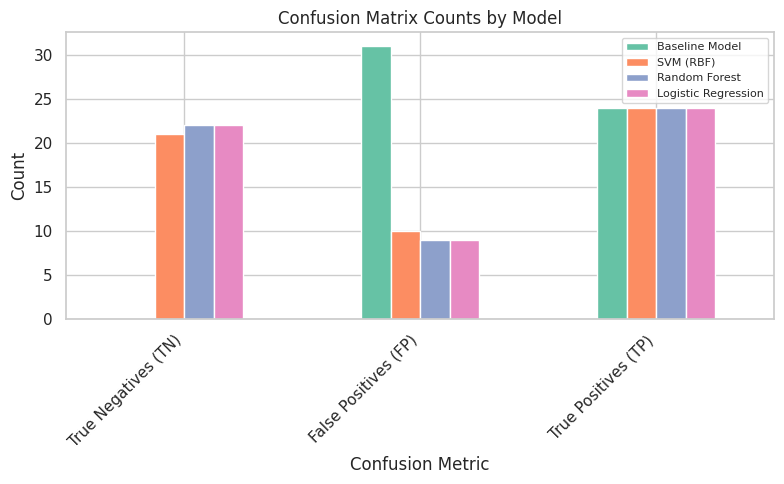

In [4]:
# Construct confusion matrix counts without the FN row
cm_data = {
    'Baseline Model':     [0, 31, 24],
    'SVM (RBF)':           [21, 10, 24],
    'Random Forest':       [22,  9, 24],
    'Logistic Regression': [22,  9, 24]
}
cm_index = [
    'True Negatives (TN)',
    'False Positives (FP)',
    'True Positives (TP)'
]

# Create DataFrame
df_cm = pd.DataFrame(cm_data, index=cm_index)

# Set seaborn style and choose a palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2", n_colors=len(df_cm.columns))

# Plot confusion matrix counts by model with seaborn palette
ax = df_cm.plot(kind='bar', color=palette, figsize=(8, 5))
ax.set_title('Confusion Matrix Counts by Model')
ax.set_ylabel('Count')
ax.set_xlabel('Confusion Metric')
plt.xticks(rotation=45, ha='right')

# Move legend to the left outside the plot with reduced font size
ax.legend(loc='upper right', prop={'size': 8})

plt.tight_layout()
plt.show()

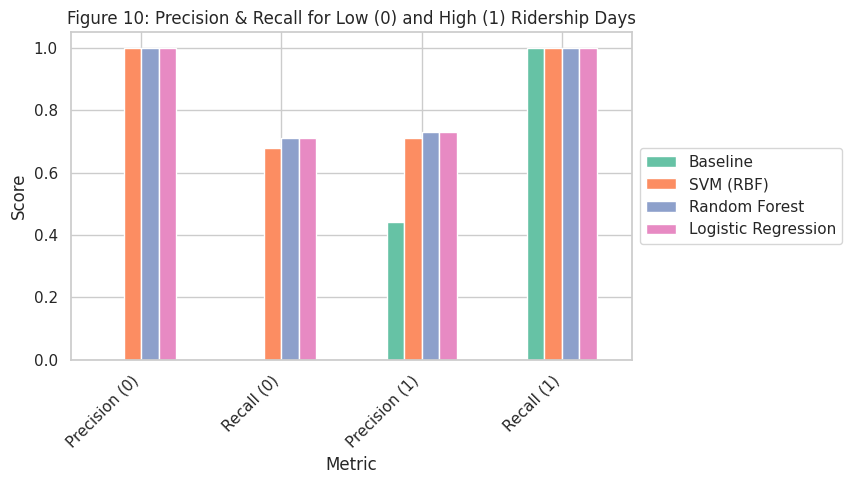

In [6]:
# Data: Precision and Recall for class 0 and class 1
data = {
    'Metric': ['Precision (0)', 'Recall (0)', 'Precision (1)', 'Recall (1)'],
    'Baseline':             [0.00, 0.00, 0.44, 1.00],
    'SVM (RBF)':            [1.00, 0.68, 0.71, 1.00],
    'Random Forest':        [1.00, 0.71, 0.73, 1.00],
    'Logistic Regression':  [1.00, 0.71, 0.73, 1.00]
}

# Create DataFrame
df = pd.DataFrame(data).set_index('Metric')

# Set seaborn theme and pick a color palette
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2", n_colors=len(df.columns))

# Plot grouped bar chart with custom palette
ax = df.plot(kind='bar', figsize=(8, 5), color=palette)
ax.set_title('Figure 10: Precision & Recall for Low (0) and High (1) Ridership Days')
ax.set_ylabel('Score')
ax.set_xlabel('Metric')
plt.xticks(rotation=45, ha='right')

# Move legend outside to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Make room on the right
plt.tight_layout()
plt.subplots_adjust(right=0.8)

plt.show()